<a href="https://colab.research.google.com/github/sysphcd/PythonProgrammingforData/blob/main/Projects/Numpy_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy Mini-project with exams dataset
The context (what is the general subject, why is it important to you?)
A link to more information if this is available online
A description of the story you would like to tell from the data (e.g. visualisation of current and predicted trends, the proportion of each category, a correlation, a prediction from a decision type model, a set of summary statistics, etc)

# Investigate, wrangle, add new data to the dataframe, filter and correlate

The following data file contains data about student scores in math, reading and writing.  The exam scores are assumed to be percentages. It also contains data about gender, ethnicity, parental education, whether the student qualifies for free school food and whether or not the student has taken a preparation course for the exams.  The data set has already been cleaned. 

1.  Investigate the data set.

2.  Create numpy arrays to hold each of the three sets of scores.  
Create a new numpy array to hold the average exam score (of the three scores for each student)
Add the new numpy array as a new column in the dataframe.

3.  Filter the original dataset into a new dataframe containing just the females.  Calculate the average exam scores for all rows in this new dataframe and then find the mean of the average column.

4.  Do the same for the males.

5.  Use the original dataset to find the correlation coefficient for reading and maths.  How closely do they correlate?  Write what you find in a text box below the code.

6.  Do the same for reading and writing. What do you find?

7.  You might want to filter on different criteria and check correlation (e.g. those on free school meals, or those who had prepared, etc)







# Data Source

The dataset can be accessed here:  https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/exams.csv.  This is a .csv file.

**NOTE:** Some useful references are included at the bottom of this spreadsheet.

Use the code cell below to work your code.

## About the data
The following data file contains data about student scores in math, reading and writing.  The exam scores are assumed to be percentages. It also contains data about gender, ethnicity, parental education, whether the student qualifies for free school food and whether or not the student has taken a preparation course for the exams. The data set has already been cleaned.

In [2]:
import pandas as pd
import numpy as np

## Data Retrieval

In [4]:
def get_data(url):
  df = pd.read_csv(url)
  return df

url = "https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/exams.csv"
df = get_data(url)

## Inspect the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   gender              1000 non-null   object
 1   ethnicity           1000 non-null   object
 2   parental_education  1000 non-null   object
 3   lunch               1000 non-null   object
 4   preparation_course  1000 non-null   object
 5   math_score          1000 non-null   int64 
 6   reading_score       1000 non-null   int64 
 7   writing_score       1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
display(df.head())
display(df.tail())

,gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score
0,female,group E,some college,free/reduced,none,65,76,71
1,male,group C,some college,standard,completed,75,72,69
2,female,group B,some high school,free/reduced,completed,62,56,61
3,male,group D,some high school,standard,completed,60,60,59
4,female,group C,high school,free/reduced,completed,34,54,55


,gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score
995,male,group B,some college,standard,completed,80,73,74
996,male,group D,high school,standard,completed,82,87,82
997,female,group C,associate's degree,standard,completed,65,94,93
998,male,group B,master's degree,free/reduced,none,62,62,57
999,male,group B,some college,standard,none,38,39,40


What it looks like (this will be illustrated through a coded function)
An explanation of what the columns show



## Cleaning Data 

The data set has already been cleaned.

# Process and Calculate Data

Create numpy arrays to hold each of the three sets of scores.
Create a new numpy array to hold the average exam score (of the three scores for each student) Add the new numpy array as a new column in the dataframe.

In [11]:
def cal_avg_score(df,col1,col2,col3):
  #Create numpy arrays to hold each of the three sets of scores.
  nparray_col1 = np.array(df[col1])
  nparray_col2 = np.array(df[col2])
  nparray_col3 = np.array(df[col3])
  #Create a new numpy array to hold the average exam score (of the three scores for each student) 
  nparray_avg_score = (nparray_col1 + nparray_col2 + nparray_col3)/3

  #Add the new numpy array as a new column in the dataframe.
  df['avg_score'] = nparray_avg_score.tolist()
  #display(df)
  return df


print('---------------Average scores ----------------------')
df_withavg = cal_avg_score(df,'math_score','reading_score','writing_score')
display(df_withavg)

---------------Average scores ----------------------


,gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score,avg_score
0,female,group E,some college,free/reduced,none,65,76,71,70.666667
1,male,group C,some college,standard,completed,75,72,69,72.000000
2,female,group B,some high school,free/reduced,completed,62,56,61,59.666667
3,male,group D,some high school,standard,completed,60,60,59,59.666667
4,female,group C,high school,free/reduced,completed,34,54,55,47.666667
...,...,...,...,...,...,...,...,...,...
995,male,group B,some college,standard,completed,80,73,74,75.666667
996,male,group D,high school,standard,completed,82,87,82,83.666667
997,female,group C,associate's degree,standard,completed,65,94,93,84.000000
998,male,group B,master's degree,free/reduced,none,62,62,57,60.333333


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1080x576 with 0 Axes>

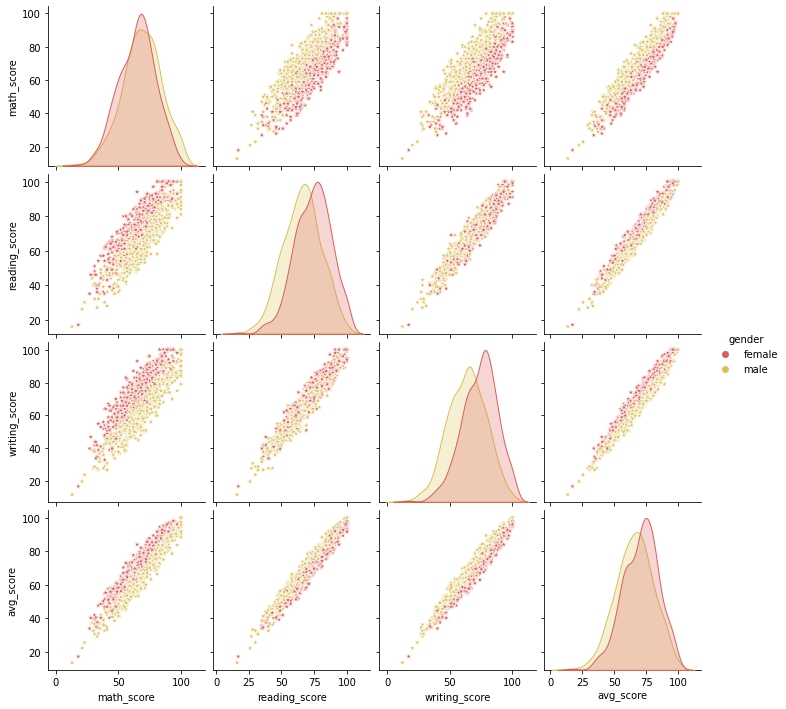

In [24]:
# Reference this from https://seaborn.pydata.org/tutorial/color_palettes.html
sns.set_palette('hls',8) 
plt.figure(figsize = (15,8))
bi_var_plot = sns.pairplot(df_withavg, hue="gender",diag_kind="kde", markers='*'); #Using markers and pair plotting from https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.set_style("darkgrid")
plt.show()

<function matplotlib.pyplot.show>

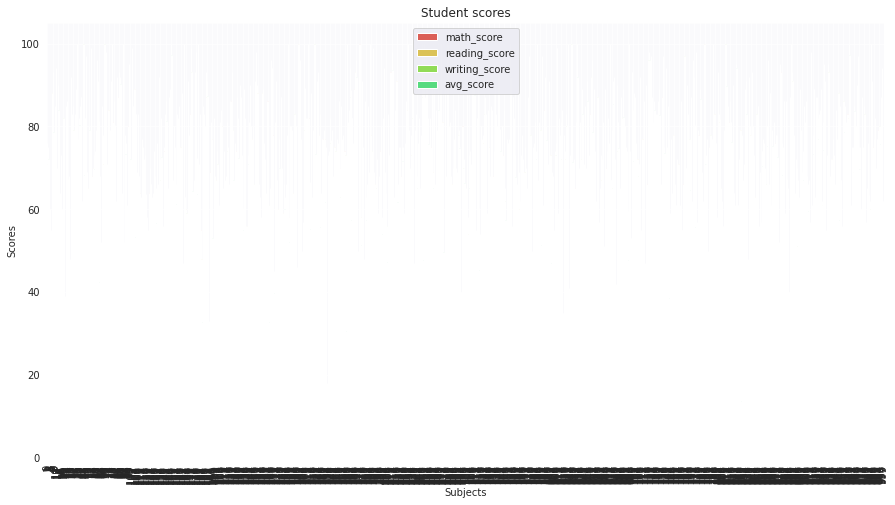

In [25]:
df_withavg.plot(kind="bar",figsize=(15, 8))
plt.title("Student scores")
plt.xlabel("Subjects")
plt.ylabel("Scores")
plt.show

Filter the original dataset into a new dataframe containing just the females. Calculate the average exam scores for all rows in this new dataframe and then find the mean of the average column. Do the same for the males.

In [12]:
def filter_avg_gender(df_withavg,gender):
  #display(df_withavg)
  #Filter the original dataset into a new dataframe containing just the females.
  gender_df = df_withavg[df_withavg['gender'] == gender]
  #Calculate the average exam scores for all rows in this new dataframe and then find the mean of the average column.
  nparray_avg_score = np.array(gender_df['avg_score'])
  print(f"{gender} mean :" ,nparray_avg_score.mean())
filter_avg_gender(df_withavg,'female')
filter_avg_gender(df_withavg,'male')

female mean : 70.81989247311829
male mean : 65.99272486772487


## Pearson's Correlation Coefficient
Next let's find the Pearson product-moment correlation coefficient between year and the rise in sea level.


Use the original dataset to find the correlation coefficient for reading and maths. How closely do they correlate? Write what you find in a text box below the code.



In [14]:
def cal_coef(df,col1,col2):
  #Use the original dataset to find the correlation coefficient for reading and maths. 
  #How closely do they correlate? Write what you find in a text box below the code.
  nparray_col1 = np.array(df[col1])
  nparray_col2 = np.array(df[col2])
  coef = np.corrcoef(nparray_col1,nparray_col2)
  print(f'correlation coefficient for {col1} and {col2} :\n',coef)

print('---------------correlation coefficient reading & math ----------------------')
cal_coef(df,'reading_score','math_score')
print('what do i find ? \n')
print('The matrix gives 4 values showing the correlation between:\n')
print('|    (reading/reading)           (reading/math)  |\n')
print('|    (math/reading)                 (math/math)  | \n')
print('This suggests that math decreases with reading (the correlation is posigive so as one increases the other increases) \n')
print('but that the correlation is quite strong (an absolute correlation would be 1 and no correlation would be 0)\n')  
 

---------------correlation coefficient reading & math ----------------------
correlation coefficient for reading_score and math_score :
 [[1.         0.81459752]
 [0.81459752 1.        ]]
what do i find ? 

The matrix gives 4 values showing the correlation between:

|    (reading/reading)           (reading/math)  |

|    (math/reading)                 (math/math)  | 

This suggests that math decreases with reading (the correlation is posigive so as one increases the other increases) 

but that the correlation is quite strong (an absolute correlation would be 1 and no correlation would be 0)



Do the same for reading and writing. What do you find?

In [16]:
print('----------------correlation coefficient reading & writing ----------------------')
cal_coef(df,'reading_score','writing_score')
print('what do i find ? \n') 
print('the correlation is quite strong (an absolute correlation would be 1 and no correlation would be 0) ')

----------------correlation coefficient reading & writing ----------------------
correlation coefficient for reading_score and writing_score :
 [[1.         0.95676863]
 [0.95676863 1.        ]]
what do i find ? 

the correlation is quite strong (an absolute correlation would be 1 and no correlation would be 0) 


## Filtering Correlation Coefficient 
You might want to filter on different criteria and check correlation (e.g. those on free school meals, or those who had prepared, etc)

In [18]:
def cal_coef_filtered(df,col1,col2,filterkey,filtervalue):
  #You might want to filter on different criteria and check correlation 
  filter_df = df[df[filterkey] == filtervalue]
  nparray_col1 = np.array(filter_df[col1])
  nparray_col2 =np.array(filter_df[col2])
  coef = np.corrcoef(nparray_col1,nparray_col2)
  print(f'correlation coefficient for {filtervalue} {col1} and {col2} :\n',coef)
  return coef


print('---------------correlation coefficient filtered data ----------------------')
coef_f = cal_coef_filtered(df,'reading_score','math_score','gender','female')
coef_m = cal_coef_filtered(df,'reading_score','math_score','gender','male')


---------------correlation coefficient filtered data ----------------------
correlation coefficient for female reading_score and math_score :
 [[1.         0.88082438]
 [0.88082438 1.        ]]
correlation coefficient for male reading_score and math_score :
 [[1.         0.90049667]
 [0.90049667 1.        ]]


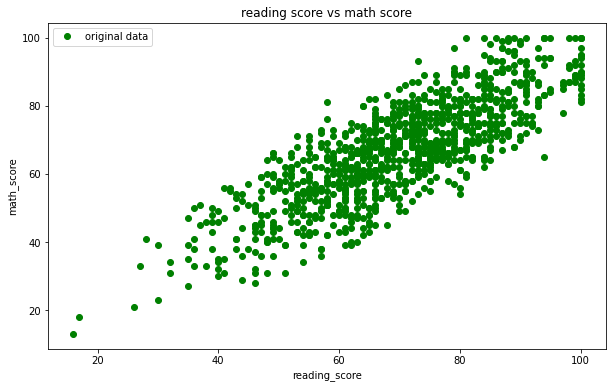

In [19]:

def draw_oneplot(x_array,y_array,x_label,y_label,plot_title):
  plt.figure(figsize=(10,6))
  plt.plot(x_array, y_array, 'o', color = 'g', label='original data') 
  plt.legend()
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(plot_title)
  plt.show()
  return


reading_scores = np.array(df['reading_score'])
math_scores = np.array(df['math_score'])
fig1 = draw_oneplot(reading_scores, math_scores,'reading_score','math_score',"reading score vs math score")

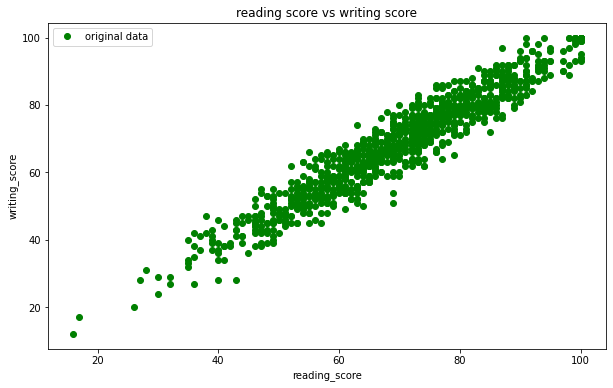

In [20]:
reading_scores = np.array(df['reading_score'])
writing_scores = np.array(df['writing_score'])
fig1 = draw_oneplot(reading_scores, writing_scores,'reading_score','writing_score',"reading score vs writing score")

In [26]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics
from scipy import stats
from scipy.stats.stats import pearsonr
import numpy as np

In [30]:
x = np.array(df['reading_score']).reshape(-1,1)
y = np.array(df['math_score']).reshape(-1,1)
# build a LinearRegression model, fit to the data
model = LinearRegression(fit_intercept=True)
# fitting the model
model.fit(x, y) 
# give a forecast years until year 2100 
x_new = np.linspace(20, 100).reshape(-1, 1) #an array of values you want to predict from
# predicting values : Use model to predict for many years
y_new = model.predict(x_new) #predict the levels_forecast 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


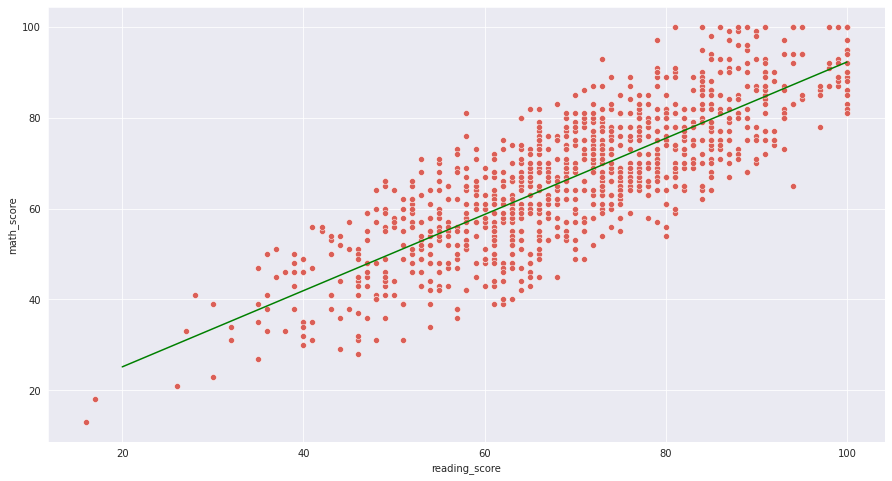

In [32]:
# plot regression line : over-plot with measured data
plt.figure(figsize = (15,8))
ax = sns.scatterplot(x[:,0],y[:,0])
# sns.regplot(x=years, y=sea_levels, data=filted_sealevel_df, color='red');
#create scatterplot with regression line
sns.lineplot(x = x_new[:,0],y = y_new[:,0], color='green')
ax.set(xlabel='reading_score', ylabel='math_score')
ax.grid(True)
plt.show()

# Conclusion

# Reflection



### What skills have I demonstrated in completing this Project?




### What did I learn in this project?

### Helpful references
---

Filtering on criteria using df references:  
`filtered_df = df[df['column name' == value]]`  

Filtering on multiple criteria using df reference:  
`filtered_df = df[df['first column name' == value] & df[second column name] >= value]`

Numpy help sheet:  http://datacamp-community-prod.s3.amazonaws.com/da466534-51fe-4c6d-b0cb-154f4782eb54

